<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/DeepLearning/5_Evaluacion_Modelos/1_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Evaluación de los Modelos
Como científicos de aprendizaje automático, nuestro objetivo es descubrir *patrones*. Pero, ¿cómo podemos estar seguros de que realmente hemos descubierto un patrón *general* y no simplemente memorizado nuestros datos?

Por ejemplo, imagine que quisiéramos buscar patrones entre los marcadores genéticos que vinculan a los pacientes con su estado de demencia, donde las etiquetas se extraen del conjunto $\{\text{demencia}, \text{deterioro cognitivo leve}, \text{saludable}\}$

![Imgur](https://i.imgur.com/dDq3aAi.png)

Debido a que los genes de cada persona los identifican de manera única (ignorando a los hermanos idénticos), es posible memorizar todo el conjunto de datos. No queremos que nuestro modelo diga **"¡Ese es Bob! ¡Lo recuerdo! ¡Tiene demencia!"** La razón es simple. Cuando implementemos el modelo en el futuro, encontraremos pacientes que el modelo nunca antes había visto. Nuestras predicciones solo serán útiles si nuestro modelo realmente ha descubierto un patrón *general*.

Para recapitular de manera más formal, nuestro objetivo es **descubrir patrones que capturen regularidades en la población subyacente de la que se extrajo nuestro conjunto de entrenamiento**. Si tenemos éxito en este esfuerzo, entonces podríamos evaluar con éxito el riesgo incluso para personas con las que nunca nos hemos encontrado antes. Este problema, cómo descubrir patrones que ***generalizan***, es el problema fundamental del aprendizaje automático.

El peligro es que cuando entrenamos modelos, solo accedemos a una pequeña muestra de datos. Los conjuntos de datos de imágenes públicas más grandes contienen aproximadamente un millón de imágenes. Más a menudo, debemos aprender de solo miles o decenas de miles de ejemplos de datos. En un gran sistema hospitalario, podríamos acceder a cientos de miles de registros médicos. Cuando trabajamos con muestras finitas, corremos el riesgo de descubrir asociaciones aparentes que resultan no sostenerse cuando recopilamos más datos.

El fenómeno de ajustar nuestros datos de entrenamiento más estrechamente de lo que ajustamos a la distribución subyacente se denomina ***sobreajuste***, y las técnicas utilizadas para combatir el sobreajuste se denominan ***regularización***. En las secciones anteriores, es posible que haya observado este efecto mientras experimentaba con el conjunto de datos Fashion-MNIST. Si modificó la estructura del modelo o los hiperparámetros durante el experimento, es posible que haya notado que, con suficientes neuronas, capas y épocas de entrenamiento, el modelo finalmente puede alcanzar una precisión perfecta en el conjunto de entrenamiento, incluso cuando la precisión de los datos de prueba se deteriora.

## Error de entrenamiento y error de generalización

Para discutir este fenómeno de manera más formal,
necesitamos diferenciar entre error de entrenamiento y error de generalización.

* El **error de entrenamiento** es el error de nuestro modelo calculado en el conjunto de entrenamiento.

* El **error de generalización** es la esperanza del error de nuestro modelo si lo aplicamos a un flujo infinito de ejemplos de datos adicionales extraídos de la misma distribución de datos subyacente que nuestra muestra original.

Problemáticamente, nunca podemos calcular exactamente el error de generalización. Eso es porque el flujo de datos infinitos es un objeto imaginario. En la práctica, debemos ***estimar*** el error de generalización aplicando nuestro modelo a un **conjunto de prueba** independiente constituido por una selección aleatoria de ejemplos de datos que fueron retenidos de nuestro conjunto de entrenamiento.

![Imgur](https://i.imgur.com/i0EsG6w.png)

Según como varíen nuestros errores de entrenamiento y generalización se pueden dar los siguientes casos.

![Imgur](https://i.imgur.com/oppI5eY.png)
![Imgur](https://i.imgur.com/Yf9W7Pr.png)

El mejor modelo será aquel que obtenga un error de generalización lo más bajo posible, aunque el error de entrenamiento no sea el mínimo. En la siguiente figura vemos que, la mayoría de las veces, minimizar el error de entrenamiento (hasta el punto de volverlo 0) siempre trae aparejado un aumento del error de generalización.

![Imgur](https://i.imgur.com/c5fAp9u.png)


## Componentes del Error de Generalización

El **error de generalización** es la esperanza del error de nuestro modelo si lo aplicamos a un flujo infinito de ejemplos de datos adicionales extraídos de la misma distribución de datos subyacente que nuestra muestra original.

Si lo expresamos matemáticamente quedaría así $E[(y-\hat{y})^2]$ donde $E[]$ representa la esperanza matemática que formaliza la idea de valor medio de un fenómeno aleatorio.

Luego, mediante un par de artilugios matemáticos podemos expresar la diferencia entre la predicción dle modelo y la realidad como la suma de 3 términos.

![Imgur](https://i.imgur.com/ts8QY7i.png)


Como el error de generalización es la esperanza de esa diferencia, es equivalente a la suma de las esperanzas de cada término. Se puede demostrar que la esperanza del tercer término es cero.

![Imgur](https://i.imgur.com/R9aTxZA.png)


Esto nos permite definir el error de generalización a partir de dos componentes principales. El primer término se llama Sesgo (o Bias en inglés) y el segundo se llama Varianza.

![Imgur](https://i.imgur.com/Q1QlaHa.png)

En resumen, el error de generalización tienen las siguientes componentes:

* **Sesgo**: la diferencia entre la predicción esperada (o promedio) de nuestro modelo y el valor correcto que estamos tratando de predecir.
* **Varianza**: variabilidad esperada (o promedio) de la predicción de un modelo.
* **Error irreducible**: es el error introducido desde el marco elegido del problema y puede ser causado por factores como features no tenidas en cuenta o errores en la medición de los datos.

Puede resultar extraño hablar del error promedio de nuestros modelos dado que solo tenemos un modelo. Sin embargo, imagine que pudiera repetir todo el proceso de creación del modelo más de una vez: cada vez que recopilemos nuevos datos y ejecutemos un nuevo entrenamiento, estaríamos creando un nuevo modelo. Debido a la aleatoriedad en los conjuntos de datos subyacentes, los modelos resultantes tendrán una variedad de predicciones. El sesgo mide qué tan lejos en general están las predicciones de estos modelos del valor correcto y la varianza mide que tan lejos en general están cada una de las predicciones de estos modelos del valor medio de las predicciones.

![Imgur](https://i.imgur.com/2dlWfwB.png)



### Sesgo


En los modelos de machine learning el sesgo aparece por las suposiciones simplistas y erróneas hechas por un modelo para hacer que la función objetivo sea más fácil de aprender. Si la función que se desea aproximar es demasiado simple comparada con la función real, el modelo no será capaz de aprender y se producirá un underfitting. Por lo tanto, **para reducir el sesgo hay que aumentar la complejidad del modelo**.

![Imgur](https://i.imgur.com/tnGK9ni.png)

### Complejidad del modelo

Lo que constituye precisamente la complejidad del modelo es un asunto complejo. Muchos factores gobiernan si un modelo es o no más complejo que otro. Por ejemplo, un modelo con más parámetros podría considerarse más complejo. Un modelo cuyos parámetros pueden tomar una gama más amplia de valores podría ser más complejo. A menudo, con las redes neuronales, pensamos en un modelo que toma más iteraciones de entrenamiento como más complejo, y uno sujeto a *detención anticipada* (menos iteraciones de entrenamiento) como menos complejo.

![Imgur](https://i.imgur.com/EW5Garz.png)

### Varianza

En los modelos de machine learning la varianza aparece por una flexibilidad excesiva del modelo que le permite ajustarse al ruido presente en el dataset. Esta flexibilidad es consecuencia de la complejidad del modelo, por lo tanto, **para reducir la varianza hay que reducir la complejidad**.

![Imgur](https://i.imgur.com/g70f4yt.png)

### Equilibrio entre Sesgo y Varianza

Como la complejidad del modelo tiene efectos inversos sobre el sesgo y la varianza, el problema se reduce nuevamente a buscar un equilibrio entre ambos.

![Imgur](https://i.imgur.com/Qaz5eps.png)


## Ejemplo con polinomios

Para ilustrar alguna intuición clásica sobre el sobreajuste y la complejidad del modelo, damos un ejemplo usando polinomios. Dados los datos de entrenamiento que consisten en una sola característica $x$ y una etiqueta de valor real correspondiente $y$, tratamos de encontrar el polinomio de grado $d$

$$\hat{y}= \sum_{i=0}^d x^i w_i$$

para estimar las etiquetas $y$. Este es solo un problema de regresión lineal donde nuestras características están dadas por las potencias de $x$, los pesos del modelo están dados por $w_i$ y el sesgo está dado por $w_0$ ya que $x^0 = 1$ para todo $ x$. Dado que este es solo un problema de regresión lineal, podemos usar el error cuadrático como nuestra función de pérdida.


Una función polinomial de orden superior es más compleja que una función polinomial de orden inferior, ya que el polinomio de orden superior tiene más parámetros y el rango de selección de la función modelo es más amplio.
Al corregir el conjunto de datos de entrenamiento, las funciones polinómicas de orden superior siempre deben lograr un error de entrenamiento menor (en el peor de los casos, igual) en relación con los polinomios de grado inferior. De hecho, cada vez que los ejemplos de datos tengan un valor distinto de $x$, una función polinomial con un grado igual al número de ejemplos de datos puede ajustarse perfectamente al conjunto de entrenamiento.


Ahora podemos **explorar estos conceptos de forma interactiva ajustando polinomios a los datos.**

In [ ]:
import math
import numpy as np
import torch
from torch import nn
from torch.utils import data

### Generación del dataset

Primero necesitamos datos. Dado $x$, **utilizaremos el siguiente polinomio cúbico para generar las etiquetas** en los datos de entrenamiento y prueba:

**$$y = 5 + 1.2x - 3.4\frac{x^2}{2!} + 5.6 \frac{x^3}{3!} + \epsilon $$**

$$ \text{ donde }
\epsilon \sim \mathcal{N}(0, 0.1^2).$$

El término de ruido $\epsilon$ sigue una distribución normal con una media de 0 y una desviación estándar de 0.1. Para la optimización, normalmente queremos evitar valores muy grandes de gradientes o pérdidas. Esta es la razón por la cual las *características* se reescalan de $x^i$ a $\frac{x^i}{i!}$. Nos permite evitar valores muy grandes para exponentes grandes $i$. Sintetizaremos 100 muestras cada una para el conjunto de entrenamiento y el conjunto de prueba.

In [ ]:
max_degree = 20  # Maximum degree of the polynomial
n_train, n_test = 30, 30  # Training and test dataset sizes
true_w = np.zeros(max_degree)  # Allocate lots of empty space
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

np.random.seed(3)
features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # `gamma(n)` = (n-1)!

# Shape of `labels`: (`n_train` + `n_test`,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

Nuevamente, los monomios almacenados en `poly_features` son reescalados por la función gamma, donde $\Gamma(n)=(n-1)!$. **Eche un vistazo a las primeras 2 muestras** del conjunto de datos generado. El valor 1 es técnicamente una característica, es decir, la característica constante correspondiente al sesgo.

In [ ]:
# Convert from NumPy ndarrays to tensors
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

In [ ]:
features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.4047],
         [ 1.7096]]),
 tensor([[ 1.0000e+00, -4.0468e-01,  8.1882e-02, -1.1045e-02,  1.1174e-03,
          -9.0441e-05,  6.0999e-06, -3.5264e-07,  1.7838e-08, -8.0208e-10,
           3.2458e-11, -1.1941e-12,  4.0269e-14, -1.2535e-15,  3.6234e-17,
          -9.7754e-19,  2.4724e-20, -5.8855e-22,  1.3232e-23, -2.8182e-25],
         [ 1.0000e+00,  1.7096e+00,  1.4613e+00,  8.3274e-01,  3.5591e-01,
           1.2169e-01,  3.4673e-02,  8.4680e-03,  1.8096e-03,  3.4374e-04,
           5.8764e-05,  9.1329e-06,  1.3011e-06,  1.7110e-07,  2.0894e-08,
           2.3813e-09,  2.5444e-10,  2.5587e-11,  2.4302e-12,  2.1866e-13]]),
 tensor([4.0869, 6.7556]))

### Entrenamiento y prueba del modelo

Primero **implementemos una función para evaluar la pérdida en un conjunto de datos dado**.


In [ ]:
def evaluate_loss(net, data_iter, loss):
    """Evaluate the loss of a model on the given dataset."""
    L, N = 0, 0
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        L += l.sum()
        N += l.numel()
    return L.detach()/N

def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

Ahora **definamos la función de entrenamiento**.


In [ ]:
#Primero importamos un script que contiene una clase llamada Animator
#Esa clase se va a encargar de dibujar las curvas de la función de pérdida
#durante el entrenamiento y testeo
!gdown https://drive.google.com/uc?id=15cqzybFKezkzNT7ef_46FwvMkkdE8gu7
import d2l_torch as d2l

Downloading...
From: https://drive.google.com/uc?id=15cqzybFKezkzNT7ef_46FwvMkkdE8gu7
To: /content/d2l_torch.py
100% 111k/111k [00:00<00:00, 1.75MB/s]


In [ ]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # Desactivamos el bias porque lo incluimos en nuestras poly_features
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = load_array((train_features, train_labels.reshape(-1,1)), batch_size)
    test_iter = load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.03)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 20],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
          l = loss(net(X) ,y)
          trainer.zero_grad()
          l.mean().backward()
          trainer.step()
        if epoch == 0 or (epoch + 1) % 100 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

### **Ajuste de funciones polinómicas de tercer orden (normal)**

Comenzaremos usando primero una función polinomial de tercer orden, que es del mismo orden que la función de generación de datos. Los resultados muestran que las pérdidas de entrenamiento y prueba de este modelo pueden reducirse de manera efectiva. Los parámetros del modelo aprendido también están cerca de los valores verdaderos $w = [5, 1.2, -3.4, 5.6]$.


weight: [[ 5.0044665  1.1595225 -3.4155388  5.6019506]]


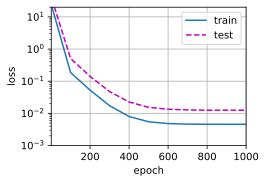

In [ ]:
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:], num_epochs=1000)


### **Ajuste de función lineal (subajuste o underfitting)**

Echemos otro vistazo al ajuste de funciones lineales. Después del declive en las primeras épocas, se vuelve difícil disminuir aún más la pérdida de entrenamiento de este modelo. Una vez completada la última iteración de época, la pérdida de entrenamiento sigue siendo alta. Cuando se utilizan para ajustar patrones no lineales (como aquí la función polinomial de tercer orden), los modelos lineales tienden a subajustar.

weight: [[3.423347 3.387724]]


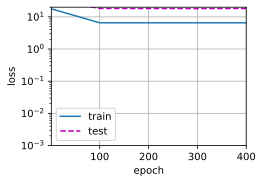

In [ ]:
# Pick the first two dimensions, i.e., 1, x, from the polynomial features
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

### **Ajuste de funciones polinómicas de orden superior (sobreajuste u overfitting)**

Ahora intentemos entrenar el modelo usando un polinomio de grado demasiado alto. Aquí, no hay datos suficientes para saber que los coeficientes de mayor grado deberían tener valores cercanos a cero. Como resultado, nuestro modelo excesivamente complejo es tan susceptible que está siendo influenciado por el ruido en los datos de entrenamiento. Aunque la pérdida de entrenamiento se puede reducir de manera efectiva, la pérdida de prueba sigue siendo mucho mayor. Muestra que el modelo complejo sobreajusta los datos.


weight: [[ 4.960134    1.17456    -3.1244633   5.369545   -0.99337184  1.2118019
   0.14090337  0.11568287  0.20541231  0.1865128  -0.17762636 -0.20851514
  -0.1345089   0.04417371 -0.20238918 -0.21712264  0.11176048  0.19480322
   0.0956763  -0.17650637]]


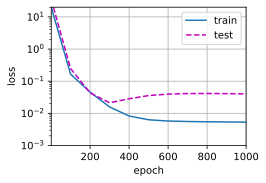

In [ ]:
# Pick all the dimensions from the polynomial features
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1000)

[Discussions](https://discuss.d2l.ai/t/97)
